# Artificial Neural Networks and Deep Learning

## Ex01 - Exploring Class Separability in 2D

In [1]:
# Imports necessários
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Gerando dataset
x0 = np.random.normal(2, 0.8, 100)    
y0 = np.random.normal(3, 2.5, 100)

x1 = np.random.normal(5, 1.2, 100)    
y1 = np.random.normal(6, 1.9, 100)

x2 = np.random.normal(8, 0.9, 100)    
y2 = np.random.normal(1, 0.9, 100)

x3 = np.random.normal(15, 0.5, 100)    
y3 = np.random.normal(4, 2.0, 100)

# Manter arrays separados para plotar
classes = [
    np.column_stack([x0, y0]),
    np.column_stack([x1, y1]),
    np.column_stack([x2, y2]),
    np.column_stack([x3, y3])
]


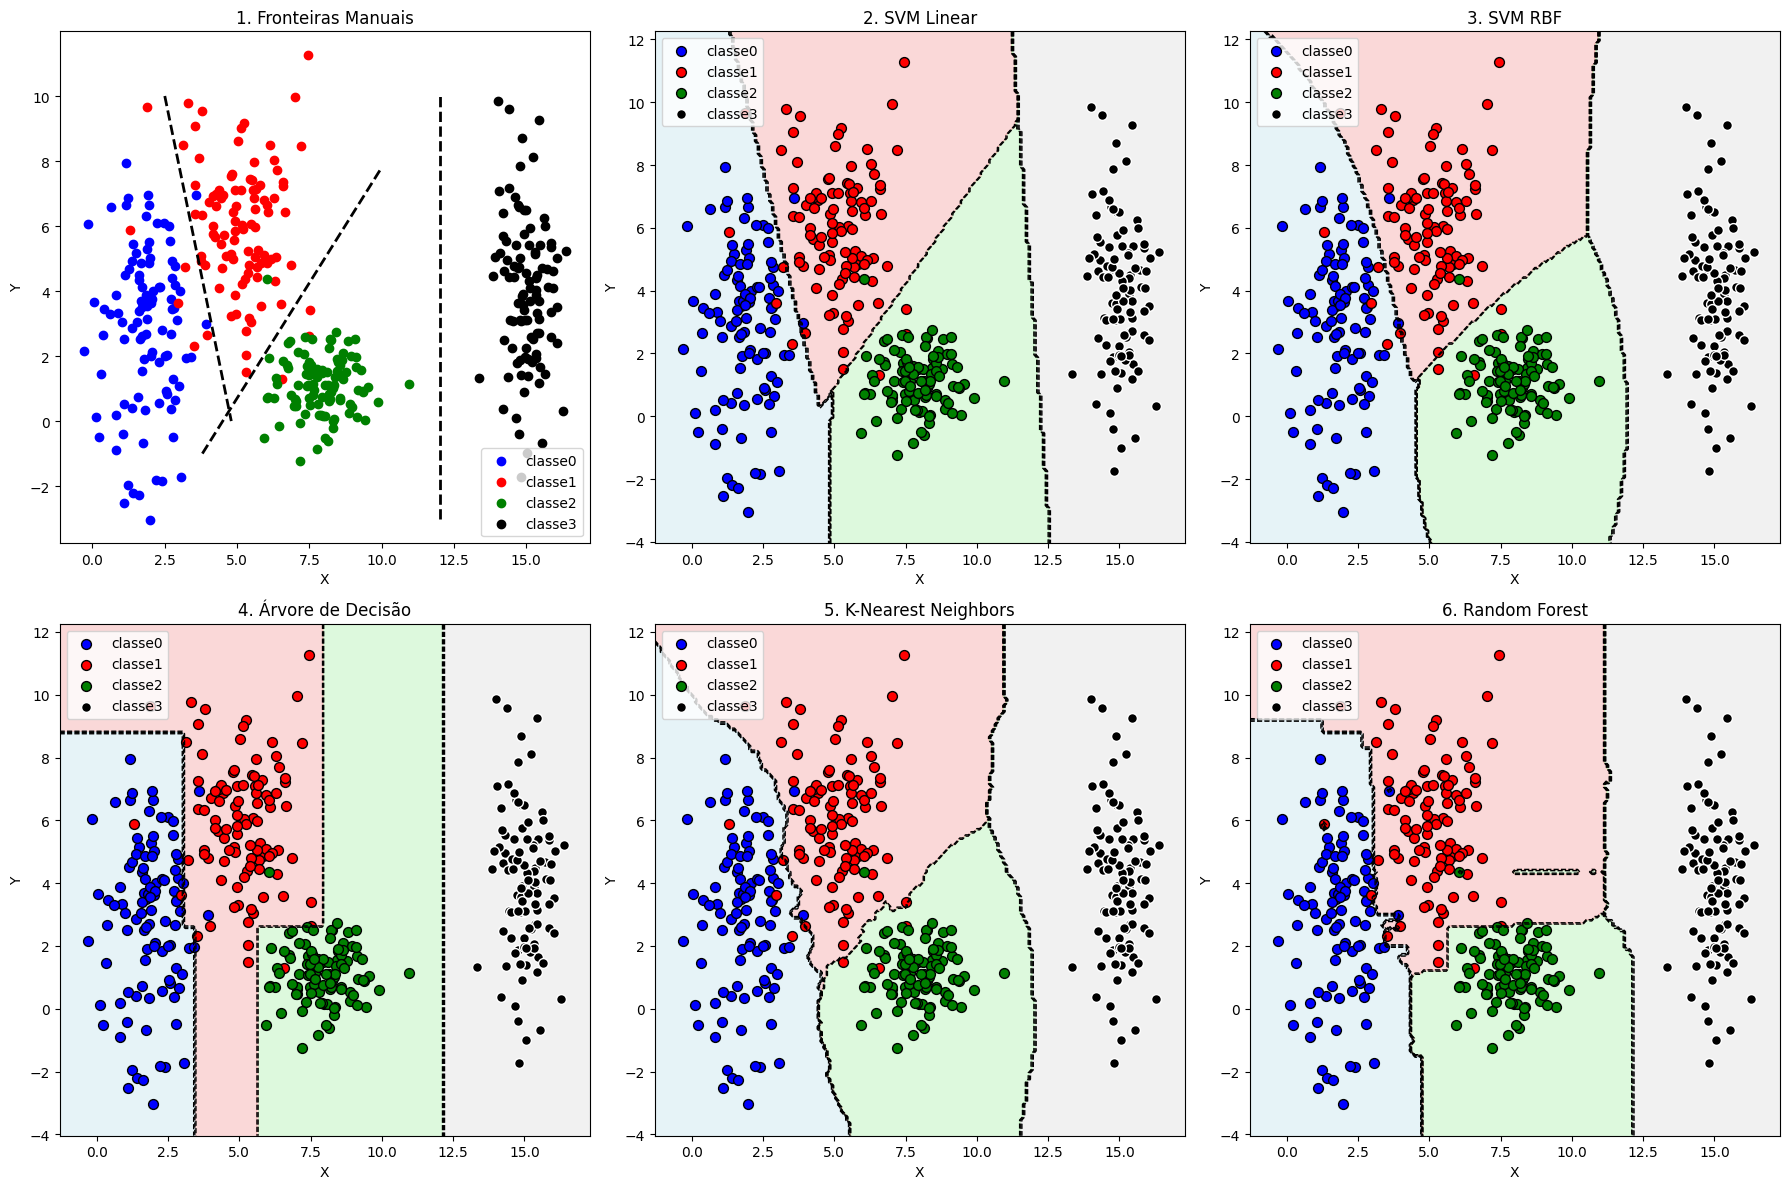


Acurácias dos modelos:
SVM Linear: 0.973
SVM RBF: 0.973
Decision Tree: 0.988
KNN: 0.973
Random Forest: 1.000


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Assumindo que você já tem os dados x0,y0,x1,y1,x2,y2,x3,y3 definidos
# Se não tiver, descomente as linhas abaixo para dados de exemplo:


# Preparar dados para os algoritmos
X = np.vstack([
    np.column_stack([x0, y0]),
    np.column_stack([x1, y1]),
    np.column_stack([x2, y2]),
    np.column_stack([x3, y3])
])

y = np.hstack([
    np.zeros(len(x0)),
    np.ones(len(x1)),
    np.full(len(x2), 2),
    np.full(len(x3), 3)
])

# Função para plotar fronteiras de decisão
def plot_decision_boundary(clf, X, y, title, ax):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgray']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    ax.contour(xx, yy, Z, colors='black', linestyles='--', linewidths=1)

# Criar figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# 1. Método Manual (o seu código original)
ax = axes[0]
ax.scatter(x0, y0, color='blue', label="classe0")
ax.scatter(x1, y1, color='red', label="classe1")
ax.scatter(x2, y2, color='green', label="classe2")
ax.scatter(x3, y3, color='black', label="classe3")

# Suas linhas manuais
ax.plot([2.5, 4.8], [10, 0], 'k--', linewidth=2)
ax.plot([3.8, 10], [-1.0, 7.8], 'k--', linewidth=2)
ax.plot([12.0, 12.0], [-3, 10], 'k--', linewidth=2)

ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('1. Fronteiras Manuais')

# 2. SVM com kernel linear
ax = axes[1]
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X, y)
plot_decision_boundary(svm_linear, X, y, 'SVM Linear', ax)

ax.scatter(x0, y0, color='blue', label="classe0", s=50, edgecolors='black')
ax.scatter(x1, y1, color='red', label="classe1", s=50, edgecolors='black')
ax.scatter(x2, y2, color='green', label="classe2", s=50, edgecolors='black')
ax.scatter(x3, y3, color='black', label="classe3", s=50, edgecolors='white')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2. SVM Linear')

# 3. SVM com kernel RBF
ax = axes[2]
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X, y)
plot_decision_boundary(svm_rbf, X, y, 'SVM RBF', ax)

ax.scatter(x0, y0, color='blue', label="classe0", s=50, edgecolors='black')
ax.scatter(x1, y1, color='red', label="classe1", s=50, edgecolors='black')
ax.scatter(x2, y2, color='green', label="classe2", s=50, edgecolors='black')
ax.scatter(x3, y3, color='black', label="classe3", s=50, edgecolors='white')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('3. SVM RBF')

# 4. Decision Tree
ax = axes[3]
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X, y)
plot_decision_boundary(dt, X, y, 'Decision Tree', ax)

ax.scatter(x0, y0, color='blue', label="classe0", s=50, edgecolors='black')
ax.scatter(x1, y1, color='red', label="classe1", s=50, edgecolors='black')
ax.scatter(x2, y2, color='green', label="classe2", s=50, edgecolors='black')
ax.scatter(x3, y3, color='black', label="classe3", s=50, edgecolors='white')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('4. Árvore de Decisão')

# 5. K-Nearest Neighbors
ax = axes[4]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
plot_decision_boundary(knn, X, y, 'KNN', ax)

ax.scatter(x0, y0, color='blue', label="classe0", s=50, edgecolors='black')
ax.scatter(x1, y1, color='red', label="classe1", s=50, edgecolors='black')
ax.scatter(x2, y2, color='green', label="classe2", s=50, edgecolors='black')
ax.scatter(x3, y3, color='black', label="classe3", s=50, edgecolors='white')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('5. K-Nearest Neighbors')

# 6. Random Forest
ax = axes[5]
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
plot_decision_boundary(rf, X, y, 'Random Forest', ax)

ax.scatter(x0, y0, color='blue', label="classe0", s=50, edgecolors='black')
ax.scatter(x1, y1, color='red', label="classe1", s=50, edgecolors='black')
ax.scatter(x2, y2, color='green', label="classe2", s=50, edgecolors='black')
ax.scatter(x3, y3, color='black', label="classe3", s=50, edgecolors='white')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('6. Random Forest')

plt.tight_layout()
plt.show()

# Opcional: Imprimir acurácias dos modelos
models = {
    'SVM Linear': svm_linear,
    'SVM RBF': svm_rbf,
    'Decision Tree': dt,
    'KNN': knn,
    'Random Forest': rf
}

print("\nAcurácias dos modelos:")
for name, model in models.items():
    accuracy = model.score(X, y)
    print(f"{name}: {accuracy:.3f}")